In [93]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set(style='white', palette='muted', color_codes=True)
import plotly.express as px
import io 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [94]:
from sklearn.preprocessing import LabelEncoder  #Changes categorical text data to numerical
from sklearn.preprocessing import OneHotEncoder # Changes cat to numerical only that its better -- check notes for difference
from sklearn.preprocessing import OrdinalEncoder #
from sklearn.preprocessing import StandardScaler #
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LinearRegression #
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score #
from sklearn.metrics import mean_squared_error #
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.ensemble import RandomForestRegressor #
from sklearn.compose import ColumnTransformer
import warnings # suppresses pesky warnings??
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [95]:
data = pd.read_csv(r'C:\Github\Fullstack-Data-Analyst\Learning\practice\testlogreg.csv')


In [107]:
data = data.astype({'bmi': 'float64', 'charges': 'float64'})
data = data.astype({'age': 'int64', 'sex': 'int64', 'children': 'int64', 'region': 'int64', 'region': 'int64'})

In [108]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.0,0,1,3,16884.0


In [97]:
# data = data.iloc[:, 1:]

In [109]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.0,0,1,3,16884.0
1,18,1,33.0,1,0,2,1725.0
2,28,1,33.0,3,0,2,4449.0
3,33,1,22.0,0,0,1,21984.0
4,32,1,28.0,0,0,1,3866.0
...,...,...,...,...,...,...,...
1333,50,1,30.0,3,0,1,10600.0
1334,18,0,31.0,0,0,0,2205.0
1335,18,0,36.0,0,0,2,1629.0
1336,21,0,25.0,0,0,3,2007.0


<AxesSubplot:>

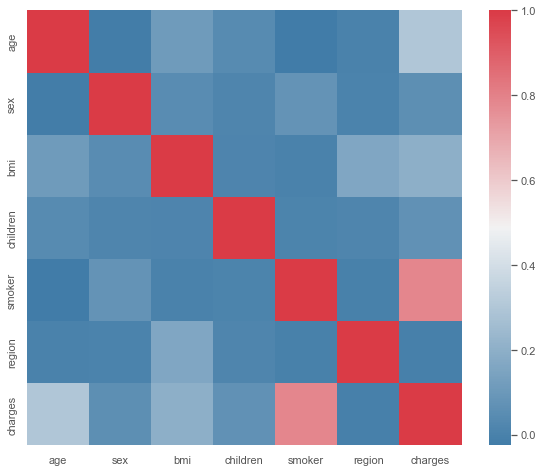

In [110]:
f, ax = plt.subplots(figsize=(10, 8))  
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [111]:
features = data.drop(["charges"], axis=1)

print('features isolated')

features isolated


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [113]:
data = data.astype('int64')

In [103]:
# data = data.astype({'sex': 'object', 'smoker': 'object', 'region': 'object', 'charges': 'int64'})

In [114]:
full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), ['age','bmi','children']),   # All the categorical columns
    ("cat", OrdinalEncoder(), ['sex', 'smoker', 'region']) ]) # All the non-categorical columns
x = pd.DataFrame(full_pipeline.fit_transform(features))
y = data["charges"] # pick the last column

print('regression x and y assigned')

regression x and y assigned


In [115]:
TEST_SIZE = 0.2
RANDOM_STATE = 0 


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE ,random_state=RANDOM_STATE )

print('Splitting complete')

Splitting complete


In [117]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(f' Accuracy on test set: {accuracy_score(y_test, y_pred):.3f}')

KeyboardInterrupt: 